In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(1,10,num=10)  #generate 10 integers
y=np.array([2.3,7.8,3.9,11.1,12.9,14,22.2,24.7,27.1,26.7])

In [3]:
x,y

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 2.3,  7.8,  3.9, 11.1, 12.9, 14. , 22.2, 24.7, 27.1, 26.7]))

In [4]:
x=x.reshape(-1,1)  #reshape to one column 
y=y.reshape(-1,1)

In [6]:
x,y

(array([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]]),
 array([[ 2.3],
        [ 7.8],
        [ 3.9],
        [11.1],
        [12.9],
        [14. ],
        [22.2],
        [24.7],
        [27.1],
        [26.7]]))

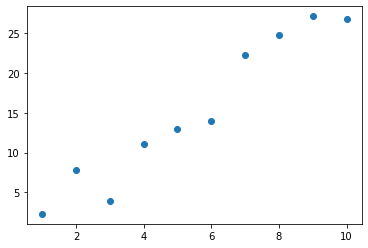

In [5]:
plt.scatter(x,y)  #the trend looks like a line

In [7]:
from sklearn import linear_model  #library of linear models including linear regression

In [8]:
ourModel=linear_model.LinearRegression() 
#we build alinear regression model (not using our data yet)

In [9]:
ourModel.fit(x,y)  #fits the model to our data

LinearRegression()

In [12]:
y_pred=ourModel.predict(x)  
#test the performance of the built model (can be used with new input or the training data)

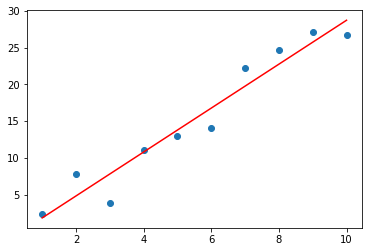

In [13]:
plt.scatter(x,y)
plt.plot(x,y_pred,c="red")
plt.show()


## Train/Test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#use 30% of the data as test set
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [16]:
xtrain

array([[9.],
       [7.],
       [5.],
       [8.],
       [1.],
       [4.],
       [2.]])

In [17]:
xtest

array([[ 6.],
       [ 3.],
       [10.]])

In [18]:
ytrain

array([[27.1],
       [22.2],
       [12.9],
       [24.7],
       [ 2.3],
       [11.1],
       [ 7.8]])

In [19]:
x,y

(array([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]]),
 array([[ 2.3],
        [ 7.8],
        [ 3.9],
        [11.1],
        [12.9],
        [14. ],
        [22.2],
        [24.7],
        [27.1],
        [26.7]]))

In [20]:
model2=linear_model.LinearRegression()

In [21]:
model2.fit(xtrain,ytrain)

LinearRegression()

In [22]:
ypred_test=model2.predict(xtest)

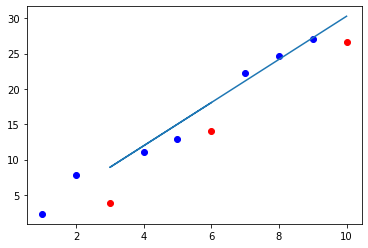

In [23]:
plt.scatter(xtrain,ytrain,c="b")
plt.scatter(xtest,ytest,c="r")
plt.plot(xtest,ypred_test)

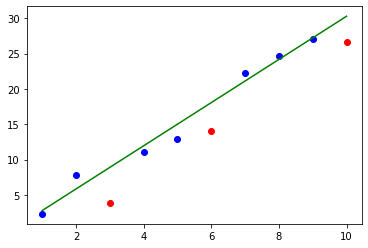

In [24]:
ypred_all=model2.predict(x)
plt.scatter(xtrain,ytrain,c="b")
plt.scatter(xtest,ytest,c="r")
plt.plot(x,ypred_all,c="g")

### Performance assesment

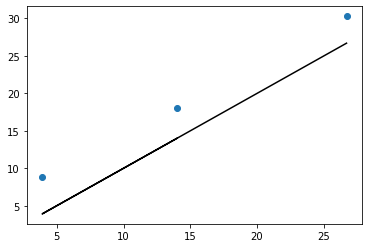

In [25]:
plt.scatter(ytest,ypred_test)
plt.plot(ytest,ytest,c="k")   #plotting the bisector
plt.show()

In [26]:
import sklearn.metrics as metrics

In [27]:
mse=metrics.mean_squared_error(ytest,ypred_test)
mse

18.116302648473646

In [28]:
mae=metrics.mean_absolute_error(ytest,ypred_test)
mae

4.21675347222222

- R2 is between (0,1).
- Unlike MSE and MAE, R2 is unitless and independant of scales.
- It measures how much of the variation of our data is explained by our model
- R2=1 is a perfect fit, and R2=0 means there is no utility in our model

In [29]:
r2=metrics.r2_score(ytest,ypred_test)
r2

0.7918038615876308

### Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
linModel=linear_model.LinearRegression()

In [32]:
cve=cross_val_score(linModel,x,y,cv=3)  #we give the full set of x and y

In [33]:
print(cve)
#Errors for each iteration (fold) 

[ 0.3893554   0.70907824 -2.6375378 ]


In [34]:
np.mean(cve), np.std(cve)

(-0.5130347189418848, 1.5079104055406)